# Random Forests 2

---

This notebook just evaluates the results of the previous notebook's grid search on random forests with 500 trees and 99 max leaf nodes using 5-fold cross validation. The purpose is to narrow down on promising representations and models so as to conduct a more robust cross validation and grid search.

*Results*

- Specificity is not a problem, Sensitivity needs to be improved
- Cosine similarity models perform better overall (best accuracies and sensitivities)
- `mtry=None` is too time consumng for the small gains it might provide, which might be random fluctuations at this point
- for the small differences in top sensitivities, `Cossim on Tfidf, mtry=50` (and `mtry=100,250`) have the best time
- this is the same representation in Intro to Text Analytics with R, so this preliminary grid search confirms that with random forests of 500 trees, this representation works generally better

*Direction*

- build random forest models varying tree depths, max leaf nodes, and use more robust CV on final models
- build different kinds of models

## Setup & Load CV results

In [1]:
import os
import time
import json
import urlextract
import numpy as np
import pandas as pd

from datetime import datetime
from nltk.stem import WordNetLemmatizer

dt_object = datetime.fromtimestamp(time.time())
day, T = str(dt_object).split('.')[0].split(' ')
print('Revised on: ' + day)

dir_path = os.path.join("..","data","3_modeling")
file_path = os.path.join(dir_path, "cv_data1.csv")
df = pd.read_csv(file_path)

Revised on: 2020-12-31


## Top mean accuracies

In [2]:
# get top accuracies
top_accs = df.sort_values(by=['mean_accuracy'], ascending=False).iloc[:10,:].copy()

# concatenate representation and mtry for x label
top_accs['repr_mtry'] = top_accs.agg(lambda x: f"{x['Representation']} - {x['mtry']}", axis=1)

# normalize seconds to fit in one plot
def normalize(X):
    norm = np.zeros([len(X)])
    for i in range(len(X)):
        norm[i] = (X[i] - min(X)) / (max(X)-min(X))
    return norm

top_accs['elapsed_norm'] = normalize(np.array(top_accs['elapsed_seconds']))
top_accs

,Representation,mean_accuracy,mean_sensitivity,mean_specificity,elapsed_seconds,mtry,repr_mtry,elapsed_norm
23,Cossim on Tfidf,0.9890,0.9303,0.9979,9.2,50.0,Cossim on Tfidf - 50.0,0.052104
38,Cossim on BoT,0.9882,0.9341,0.9965,14.9,250.0,Cossim on BoT - 250.0,0.166333
31,Cossim on Tfidf,0.9882,0.9322,0.9967,11.4,100.0,Cossim on Tfidf - 100.0,0.096192
30,Cossim on BoT,0.9879,0.9245,0.9976,9.6,100.0,Cossim on BoT - 100.0,0.060120
39,Cossim on Tfidf,0.9877,0.9322,0.9962,15.7,250.0,Cossim on Tfidf - 250.0,0.182365
22,Cossim on BoT,0.9877,0.9109,0.9994,7.9,50.0,Cossim on BoT - 50.0,0.026052
15,Cossim on Tfidf,0.9872,0.9109,0.9988,7.5,25.0,Cossim on Tfidf - 25.0,0.018036
47,Cossim on Tfidf,0.9869,0.9342,0.9950,56.5,NaN,Cossim on Tfidf - nan,1.000000
46,Cossim on BoT,0.9862,0.9264,0.9953,40.3,NaN,Cossim on BoT - nan,0.675351
14,Cossim on BoT,0.9851,0.8896,0.9997,6.6,25.0,Cossim on BoT - 25.0,0.000000


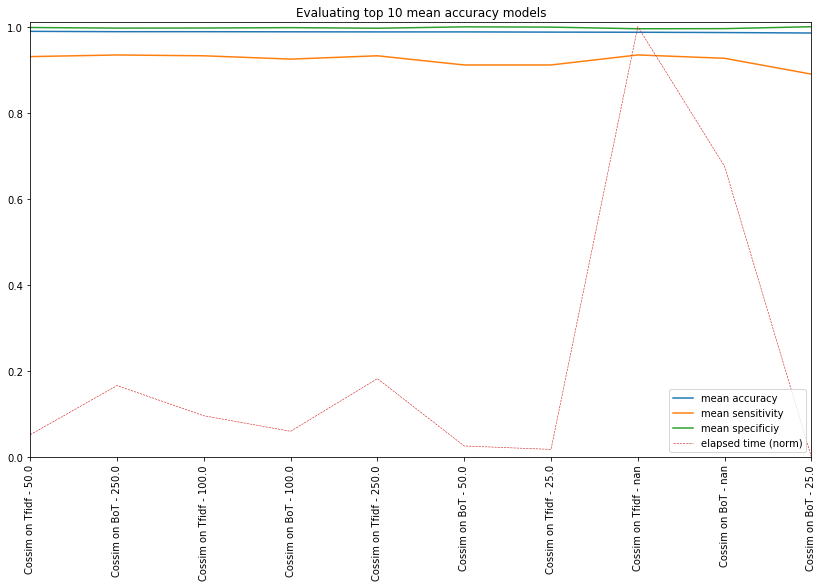

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(np.array(top_accs['mean_accuracy']), label="mean accuracy")
plt.plot(np.array(top_accs['mean_sensitivity']), label="mean sensitivity")
plt.plot(np.array(top_accs['mean_specificity']), label="mean specificiy")
plt.plot(np.array(top_accs['elapsed_norm']), label='elapsed time (norm)', linewidth=.6, linestyle='dashed')
plt.title('Evaluating top 10 mean accuracy models')
plt.xticks(np.arange(10), tuple(top_accs['repr_mtry']))
plt.legend(loc="lower right")
plt.axis([0, 9, 0.0, 1.01])
plt.xticks(rotation=90)
plt.show()

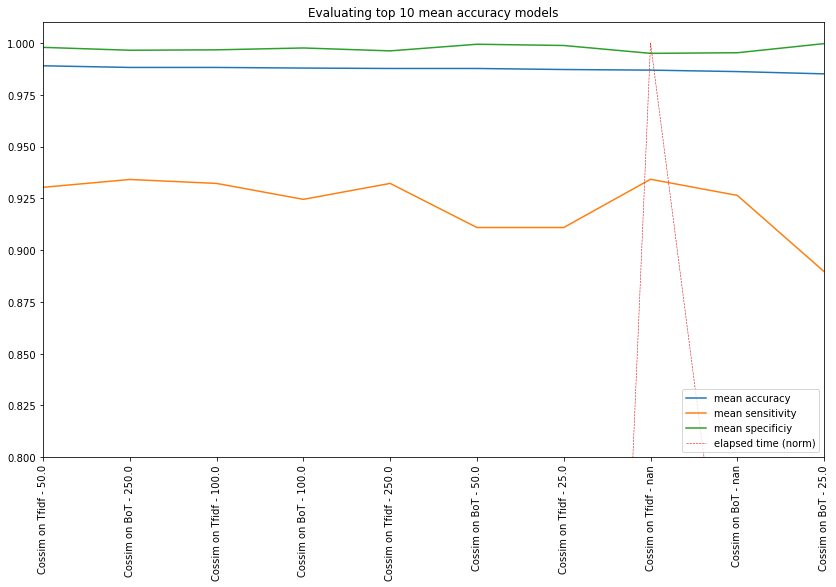

In [4]:
plt.figure(figsize=(14, 8))
plt.plot(np.array(top_accs['mean_accuracy']), label="mean accuracy")
plt.plot(np.array(top_accs['mean_sensitivity']), label="mean sensitivity")
plt.plot(np.array(top_accs['mean_specificity']), label="mean specificiy")
plt.plot(np.array(top_accs['elapsed_norm']), label='elapsed time (norm)', linewidth=.6, linestyle='dashed')
plt.title('Evaluating top 10 mean accuracy models')
plt.xticks(np.arange(10), tuple(top_accs['repr_mtry']))
plt.legend(loc="lower right")
plt.axis([0, 9, 0.8, 1.01])
plt.xticks(rotation=90)
plt.show()

- `mtry=None` in conjunction with cosine similarity models is too time consuming and sensitivity isn't necessarily better
- Sensitivity is the metric to improve and cosine simimilarity models are definitely highest as far as accuracy is concerned

## Top mean sensitivities

In [5]:
# get top accuracies
top_tprs = df.sort_values(by=['mean_sensitivity'], ascending=False).iloc[:10,:].copy()

# concatenate representation and mtry for x label
top_tprs['repr_mtry'] = top_tprs.agg(lambda x: f"{x['Representation']} - {x['mtry']}", axis=1)

# normalize seconds to fit in one plot
def normalize(X):
    norm = np.zeros([len(X)])
    for i in range(len(X)):
        norm[i] = (X[i] - min(X)) / (max(X)-min(X))
    return norm

top_tprs['elapsed_norm'] = normalize(np.array(top_tprs['elapsed_seconds']))
top_tprs

,Representation,mean_accuracy,mean_sensitivity,mean_specificity,elapsed_seconds,mtry,repr_mtry,elapsed_norm
47,Cossim on Tfidf,0.9869,0.9342,0.9950,56.5,NaN,Cossim on Tfidf - nan,1.000000
38,Cossim on BoT,0.9882,0.9341,0.9965,14.9,250.0,Cossim on BoT - 250.0,0.151020
39,Cossim on Tfidf,0.9877,0.9322,0.9962,15.7,250.0,Cossim on Tfidf - 250.0,0.167347
31,Cossim on Tfidf,0.9882,0.9322,0.9967,11.4,100.0,Cossim on Tfidf - 100.0,0.079592
23,Cossim on Tfidf,0.9890,0.9303,0.9979,9.2,50.0,Cossim on Tfidf - 50.0,0.034694
46,Cossim on BoT,0.9862,0.9264,0.9953,40.3,NaN,Cossim on BoT - nan,0.669388
30,Cossim on BoT,0.9879,0.9245,0.9976,9.6,100.0,Cossim on BoT - 100.0,0.042857
15,Cossim on Tfidf,0.9872,0.9109,0.9988,7.5,25.0,Cossim on Tfidf - 25.0,0.000000
22,Cossim on BoT,0.9877,0.9109,0.9994,7.9,50.0,Cossim on BoT - 50.0,0.008163
36,BoT + features,0.9841,0.9012,0.9967,19.5,250.0,BoT + features - 250.0,0.244898


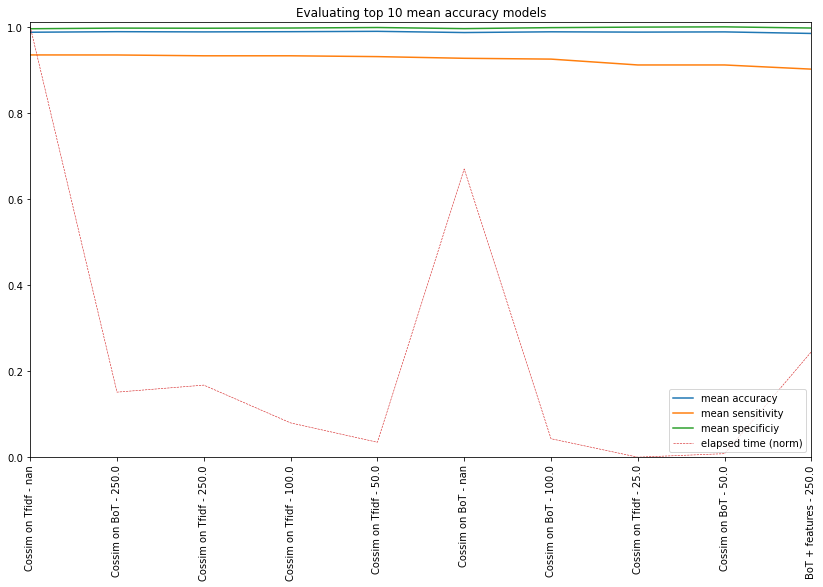

In [6]:
plt.figure(figsize=(14, 8))
plt.plot(np.array(top_tprs['mean_accuracy']), label="mean accuracy")
plt.plot(np.array(top_tprs['mean_sensitivity']), label="mean sensitivity")
plt.plot(np.array(top_tprs['mean_specificity']), label="mean specificiy")
plt.plot(np.array(top_tprs['elapsed_norm']), label='elapsed time (norm)', linewidth=.6, linestyle='dashed')
plt.title('Evaluating top 10 mean accuracy models')
plt.xticks(np.arange(10), tuple(top_tprs['repr_mtry']))
plt.legend(loc="lower right")
plt.axis([0, 9, 0.0, 1.01])
plt.xticks(rotation=90)
plt.show()

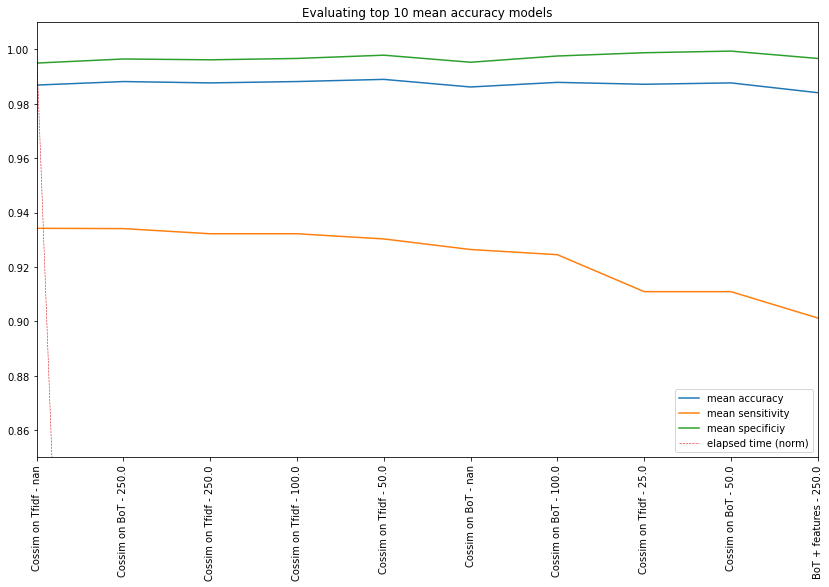

In [7]:
plt.figure(figsize=(14, 8))
plt.plot(np.array(top_tprs['mean_accuracy']), label="mean accuracy")
plt.plot(np.array(top_tprs['mean_sensitivity']), label="mean sensitivity")
plt.plot(np.array(top_tprs['mean_specificity']), label="mean specificiy")
plt.plot(np.array(top_tprs['elapsed_norm']), label='elapsed time (norm)', linewidth=.6, linestyle='dashed')
plt.title('Evaluating top 10 mean accuracy models')
plt.xticks(np.arange(10), tuple(top_tprs['repr_mtry']))
plt.legend(loc="lower right")
plt.axis([0, 9, 0.85, 1.01])
plt.xticks(rotation=90)
plt.show()

- Cosine similarity models are also the ones with best sensitivities, they win overall
- `mtry=None` is too time consumng for the small gain
- for the small differences in top sensitivities, `Cossim on Tfidf, mtry=50` has the best time (9.2 secs)
- this model and similar ones deserve further attention and more robust cross validation

---